### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Dataset

In [4]:
dataset = pd.read_csv('19_Ads_CTR_Optimisation.csv')
pd.DataFrame(dataset)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


### Implementing Thomson Sampling

In [5]:
import random
n_users = 10000
n_ads = 10
ads = []  
ad_seen = [0]*n_ads
ad_not_seen = [0]*n_ads
total = 0
for i in range(0,n_users):
    ad = 0
    max_random = 0
    for j in range(0,n_ads):
        random_beta = random.betavariate(ad_seen[j]+1,+ad_not_seen[j]+1)
        if(random_beta>max_random):
            max_random = random_beta
            ad = j
    ads.append(ad)
    reward = dataset.values[i,ad]
    if reward==1:
        ad_seen[ad]+=1
    else:
        ad_not_seen[ad]+=1
total+=reward       

### Visualising the results

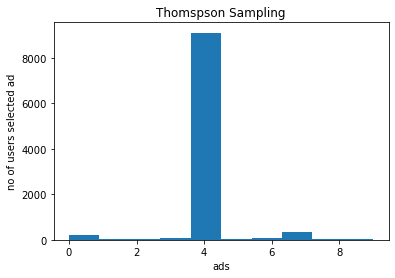

In [6]:
plt.hist(ads)
plt.title('Thomspson Sampling')
plt.xlabel('ads')
plt.ylabel('no of users selected ad')
plt.show()